The SIFT detectors is pretty much based on running the DoG algorithm as an approximation for the NLoG (Normalized Laplacian of Gaussian), and then using the Histogram of Oriented Gradients to summarize the feature -- note that the SIFT detector algorithm in OpenCV already does most of this for us so we don't need to worry about this manually.

In [5]:
import cv2
import matplotlib.pyplot as plt
import os
import numpy

#importing the correct image
image_path = os.path.abspath("./images/lebronslam.jpg")
image = cv2.imread(image_path)

# Convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)


We first create an instance of the SIFT class (as a part of OpenCV) and then use the *detectAndCompute* method in order to compute the keypoints and descriptors in the image. This is very convenient because this single method runs the whole algorithm for us.

In [6]:
# Initialize the SIFT detector
sift = cv2.SIFT_create()

# Detect SIFT keypoints and descriptors
keypoints, descriptors = sift.detectAndCompute(gray, None)

# Create a copy of the grayscale image in color
image_with_keypoints = cv2.cvtColor(gray, cv2.COLOR_GRAY2BGR)

This section involves drawing the keypoints and the circles in the image (on the gray-version of the image for improved visibility especially because I'm colorblind lol). Apart from that in this codeblock I just write standard displaying code.

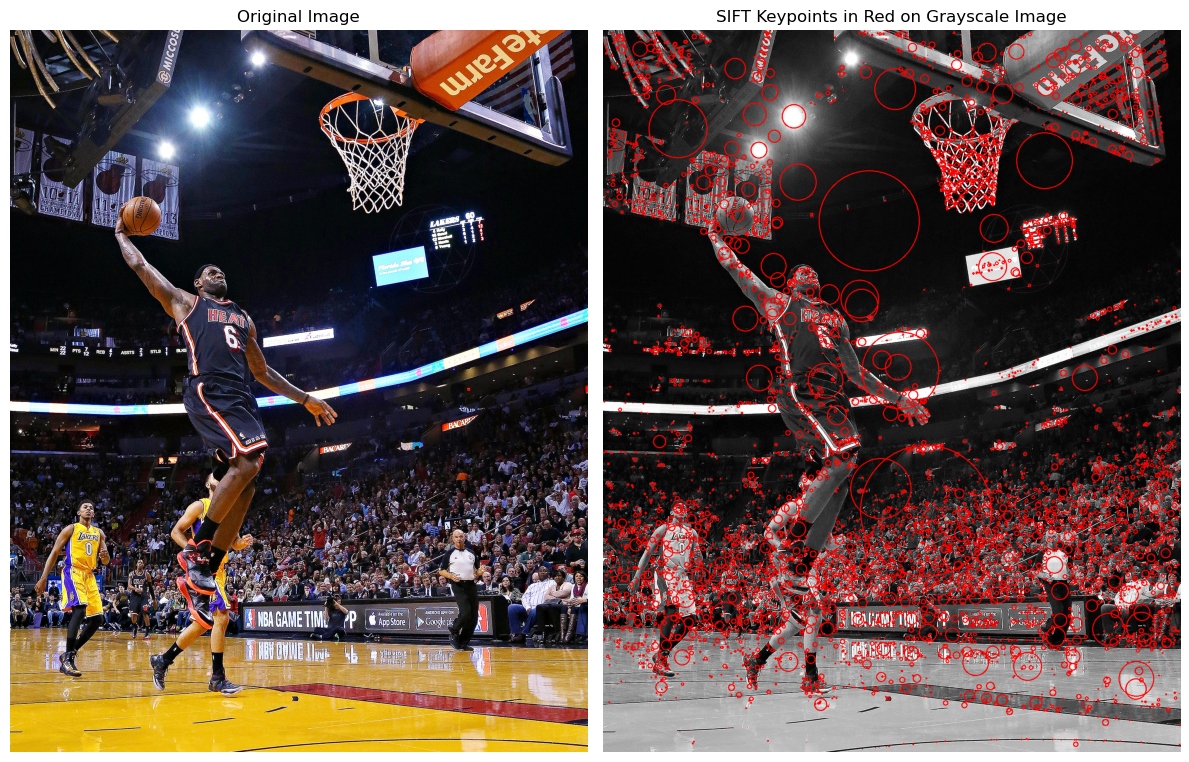

In [8]:
# Draw the keypoints in red
for keypoint in keypoints:
    x, y = keypoint.pt
    x = int(x)
    y = int(y)
    cv2.circle(image_with_keypoints, (x, y), int(keypoint.size / 2), (0, 0, 255), 2)

# Display the result
plt.figure(figsize=(12, 8))

# Show the original image in RGB
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

# Show the grayscale image with red SIFT keypoints
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(image_with_keypoints, cv2.COLOR_BGR2RGB))
plt.title('SIFT Keypoints in Red on Grayscale Image')
plt.axis('off')

plt.tight_layout()
plt.show()

You should be noticing how MANY of the features don't really look like "features" in the sense that they aren't great descriptors of the image. That is likely due to multiple reasons -- first, there is a lot of noise in the image because of the people in the background, and the general nature of the image. Remember it's taken in an NBA basketball court which has many different lightings and reflections -- to understand this, take a look at the floor and see how the floor is reflecting a lot of light and a lot of that light is actually being described as a feature. Second, there is a lot of illumination differences in the photo becuase in the back, there is less light than in the rest of the image. Finally, most of the issues with "not visible features" simply tend to occur in regions with less texture like the floor and the jersey. This is why most of these points occur in those regions. Broadly speaking, although it might *visibly* appear that the SIFT features aren't really that visible or important, just trust that they are.